# Matrix profile for anomaly detection. 

An example of how to use the Matrix Profile to spot anomalies (discords) in a time series using Python and the stumpy library.

In [2]:
import numpy as np
import stumpy
import matplotlib.pyplot as plt

# Generate a synthetic time series with an anomaly
np.random.seed(42)
time_series = np.sin(np.linspace(0, 50, 1000)) + np.random.normal(0, 0.1, 1000)
time_series[500:520] = 3  # Introduce an anomaly

# Define the subsequence length (window size)
m = 50

# Compute the Matrix Profile of the time series with itself
matrix_profile = stumpy.stump(time_series, m)

# The matrix_profile is a 2D array where the first column is the Matrix Profile itself
# and the second column is the index of the nearest neighbor subsequence
profile, indices = matrix_profile[:, 0], matrix_profile[:, 1]

# Identify the anomaly (discord) as the subsequence with the highest Matrix Profile value
anomaly_index = np.argmax(profile)


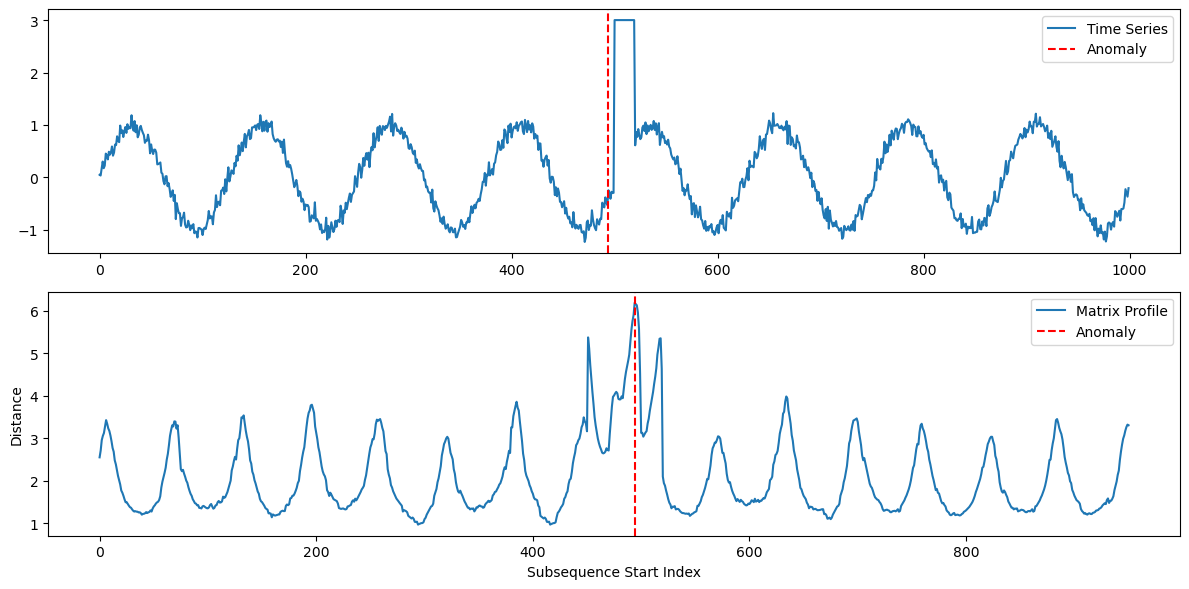

Anomaly detected at index: 494


In [3]:
# Plot the time series and highlight the anomaly
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_series, label='Time Series')
plt.axvline(anomaly_index, color='r', linestyle='--', label='Anomaly')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(profile, label='Matrix Profile')
plt.axvline(anomaly_index, color='r', linestyle='--', label='Anomaly')
plt.xlabel('Subsequence Start Index')
plt.ylabel('Distance')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Anomaly detected at index: {anomaly_index}")